In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/AI ML/Copy of FruitinAmazon.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/AI ML')

# CNN implemented with Keras

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [4]:
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9122 - loss: 0.2901 - val_accuracy: 0.9841 - val_loss: 0.0492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9855 - val_loss: 0.0411
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9912 - val_loss: 0.0264
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9901 - val_loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9903 - val_loss: 0.0293
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0366
Test accuracy: 0.9903
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# Task 1: Data Understanding and Visualization

In [5]:
# Define paths
train_data_dir = '/content/drive/MyDrive/AI ML/FruitinAmazon/train'
validation_data_dir = '/content/drive/MyDrive/AI ML/FruitinAmazon/test'

In [6]:
import os
import random
import matplotlib.pyplot as plt

In [7]:
def visualize_data(train_data_dir):
    """Visualizes data from a dataset stored in directories.

    Args:
        train_data_dir: Path to the training data directory.
    """

    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path)]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

['pupunha', 'acai', 'guarana', 'graviola', 'tucuma', 'cupuacu']


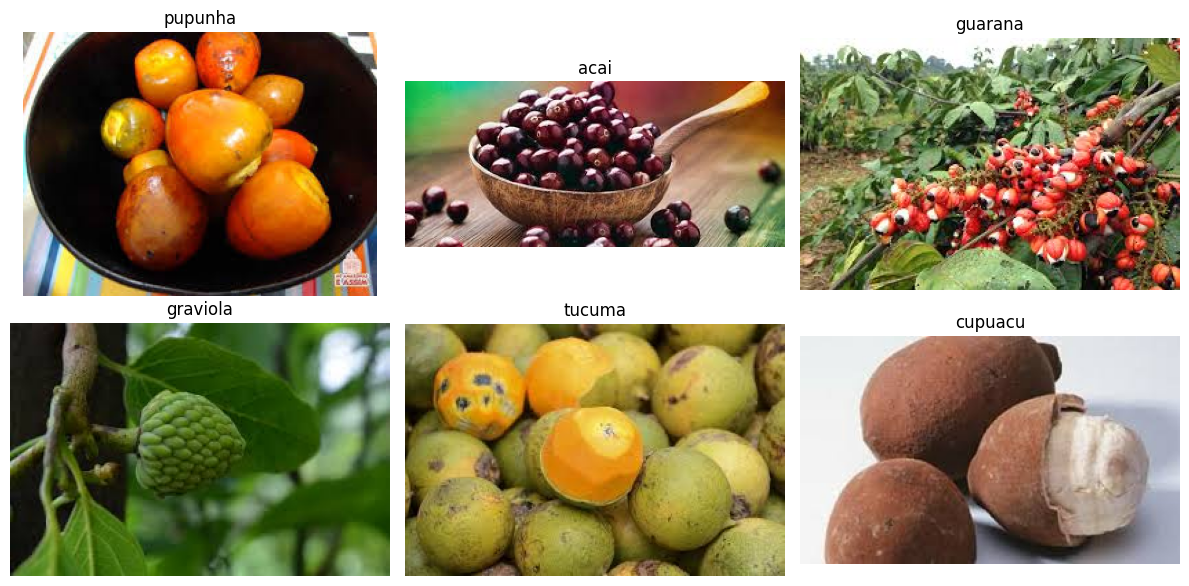

In [8]:
visualize_data(train_data_dir)

# Task 2: Loading and Preprocessing Image Data in kera

In [9]:
from PIL import Image
# Check for corrupt Images
def check_corrupted_images(dir):
  sub_dir = [d for d in os.listdir(dir)]
  for dir in sub_dir:
    class_path = os.path.join(train_data_dir, dir)
    image_files = [f for f in os.listdir(class_path)]
    for image in image_files:
      image = os.path.join(class_path, image)
      try:
          with Image.open(image) as img:
              img.verify()
      except (IOError, SyntaxError) as e:
          os.remove(image)
          print(f"Removed corrupted image: {image}")
  print("No corrupted images found.")

check_corrupted_images(train_data_dir)

No corrupted images found.


In [10]:
# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,  # Replace with the actual path to your training data directory
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,  # Replace with the actual path to your training data directory
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    validation_data_dir,  # Replace with the actual path to your training data directory
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


# Task 3 - Implement a CNN with Convolutional Architecture:

In [11]:
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3),padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),
layers.MaxPooling2D((2, 2),strides=2),
layers.Conv2D(32, (3, 3),padding="same", strides=1, activation="relu"),
layers.MaxPooling2D((2, 2),strides=2),
layers.Flatten(),
layers.Dense(64, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(6,activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Task 4: Train the Model

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
keras.callbacks.ModelCheckpoint("best_model.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True ),
]
# Train the model
history = model.fit(
    train_ds,  # Use train_ds for training data
    epochs=250,
    batch_size=16,
    validation_data=val_ds,
    callbacks= callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1693 - loss: 1.9756 - val_accuracy: 0.1111 - val_loss: 1.7456
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2895 - loss: 1.7284 - val_accuracy: 0.0556 - val_loss: 1.7813
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.3555 - loss: 1.5905 - val_accuracy: 0.1667 - val_loss: 1.7654
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.3772 - loss: 1.4527 - val_accuracy: 0.3889 - val_loss: 1.5688
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.4961 - loss: 1.2460 - val_accuracy: 0.6667 - val_loss: 1.2585
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.5760 - loss: 1.0705 - val_accuracy: 0.6667 - val_loss: 1.0221
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.7843 - loss: 0.7581 - val_accuracy: 0.5000 - val_loss: 1.2485
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8286 - loss: 0.6269 - val_accuracy: 0.8889 - val_

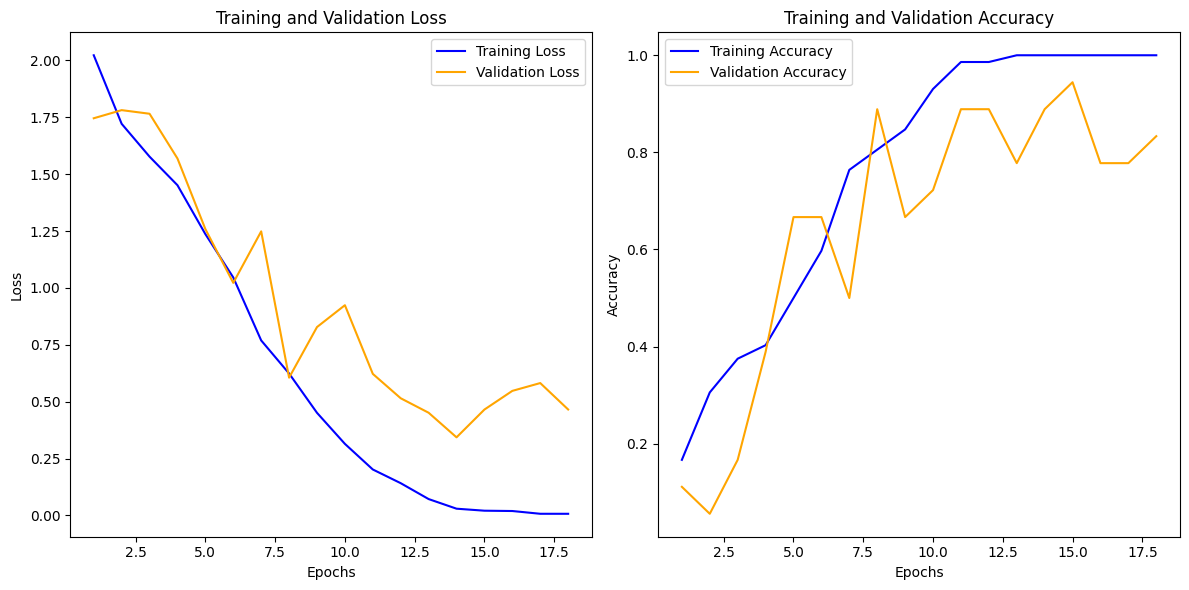

In [14]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 5: Evaluate the Model

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step - accuracy: 0.7333 - loss: 0.6993
Test accuracy: 0.7333


# Task 6: Save and Load the Model

In [16]:
# Saving dataset
model.save('bestest_model.h5')
# Load the model
bestest_model = tf.keras.models.load_model('bestest_model.h5')

# Task 7: Predictions and Classification Report

In [17]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test dataset
y_pred_probs = bestest_model.predict(test_ds)

y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)

# Get true labels from the test dataset
y_true = []
for images, labels in test_ds.unbatch():
    y_true.append(labels.numpy())
y_true = np.array(y_true)
print(y_true)
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
[0 1 0 0 0 1 2 1 1 1 2 2 2 2 2 3 5 3 3 3 4 5 3 4 4 5 1 0 5 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5
           3       0.80      0.80      0.80         5
           4       1.00      0.60      0.75         5
           5       0.50      0.40      0.44         5

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



# **Worksheet-6 Part Start**

## Task 1: Improved CNN with Data Augmentation

In [20]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation setup
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI ML/FruitinAmazon',  # update path if needed
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI ML/FruitinAmazon',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Deeper CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371,714 (12.86 MB)

 Trainable params: 3,371,266 (12.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6172 - loss: 8.7911 - val_accuracy: 0.7500 - val_loss: 0.5730
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.6888 - loss: 3.4374 - val_accuracy: 0.2917 - val_loss: 0.7581
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - accuracy: 0.4987 - loss: 2.8958 - val_accuracy: 0.6667 - val_loss: 0.6612
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.6510 - loss: 1.2566 - val_accuracy: 0.5417 - val_loss: 0.9160
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.7161 - loss: 1.4605 - val_accuracy: 0.5417 - val_loss: 0.9847
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.8060 - loss: 0.7414 - val_accuracy: 0.5000 - val_loss: 1.5216
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.7461 - loss: 1.0510 - val_accuracy: 0.4167 - val_loss: 1.6331
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.6693 - loss: 0.9424 - val_accuracy: 0.4167 - val_loss: 1

## Task 2: Transfer Learning with VGG16

In [23]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load VGG16 without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)
vgg_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,242,050 (58.14 MB)

 Trainable params: 527,362 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:

vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5781 - loss: 0.7100 - val_accuracy: 0.7500 - val_loss: 0.7229
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - accuracy: 0.7656 - loss: 0.6859 - val_accuracy: 0.7500 - val_loss: 0.6624
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 461ms/step - accuracy: 0.7409 - loss: 0.5966 - val_accuracy: 0.5000 - val_loss: 0.7113
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.6732 - loss: 0.6239 - val_accuracy: 0.7083 - val_loss: 0.6571
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.7656 - loss: 0.5274 - val_accuracy: 0.7500 - val_loss: 0.6971
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.7539 - loss: 0.5278 - val_accuracy: 0.6667 - val_loss: 0.6052
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.7773 - loss: 0.4819 - val_accuracy: 0.6250 - val_loss: 0.6513
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.7773 - loss: 0.4794 - val_accuracy: 0.6667 - val_loss: 0.

In [25]:

import numpy as np
from sklearn.metrics import classification_report

# Generate predictions
val_generator.reset()
preds = vgg_model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# Classification report
class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
              precision    recall  f1-score   support

        test       0.00      0.00      0.00         6
       train       0.74      0.94      0.83        18

    accuracy                           0.71        24
   macro avg       0.37      0.47      0.41        24
weighted avg       0.55      0.71      0.62        24



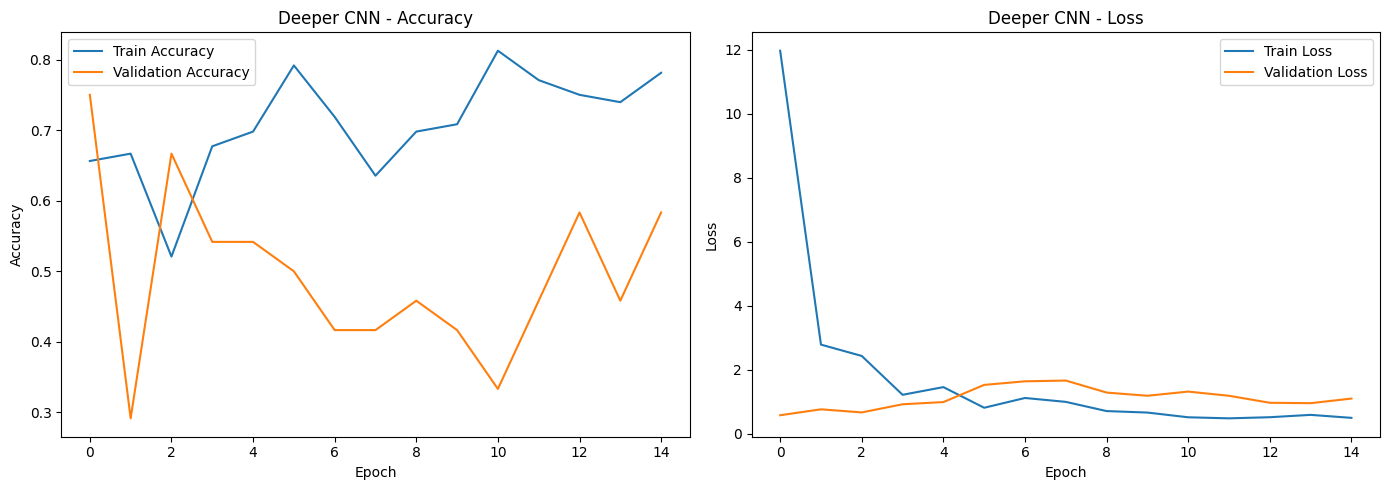

In [26]:
import matplotlib.pyplot as plt

# Plot for deeper CNN model
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deeper CNN - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Deeper CNN - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

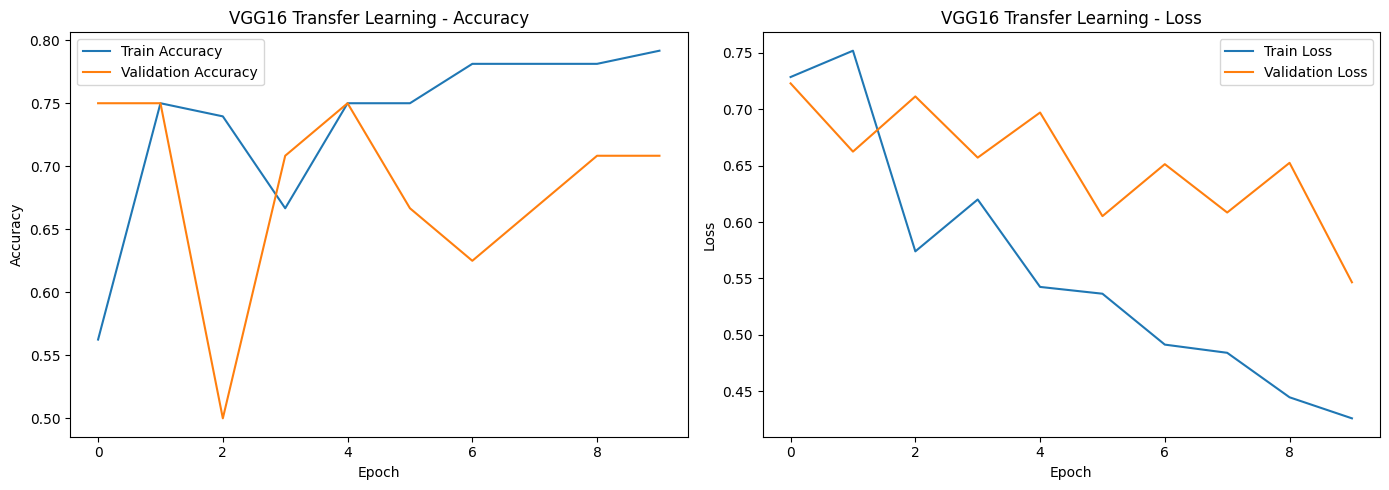

In [27]:
# Plot for VGG16 transfer learning model
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Transfer Learning - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='Train Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Transfer Learning - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()